# **Regression**

In [8]:
import pandas as pd

### **Simple Regression**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/iRavshan/Data-Science-and-AI/main/assets/datasets/regression/salary_dataset.csv', index_col=0)

In [3]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


### **Multiple Regression**

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/iRavshan/Data-Science-and-AI/main/assets/datasets/student_performance.csv')

In [10]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## **Practice makes perfect!**

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

## **Making pipeline**

In [35]:
cat_columns = ['Extracurricular Activities']
num_columns = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

num_pip = Pipeline(steps=[
    ('scaler', StandardScaler()) 
])

cat_pip = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_pip, num_columns),
    ('cat', cat_pip, cat_columns)],
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', TransformedTargetRegressor(
        regressor=LinearRegression(),
        transformer=StandardScaler()
    ))
])

## **Defining features and target**

In [36]:
X = df.iloc[:, :5]
y = df.iloc[:, 5]

## **Splitting the dataframe into train and test datasets**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

## **Passing data through pipeline**

In [42]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Hours Studied',
                                                   'Previous Scores',
                                                   'Sleep Hours',
                                                   'Sample Question Papers '
                                                   'Practiced']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Extracurricular '
                                                   'Activities'])])),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=StandardScaler()))])

## **Make predictions**

In [43]:
predictions = pipeline.predict(X_test)

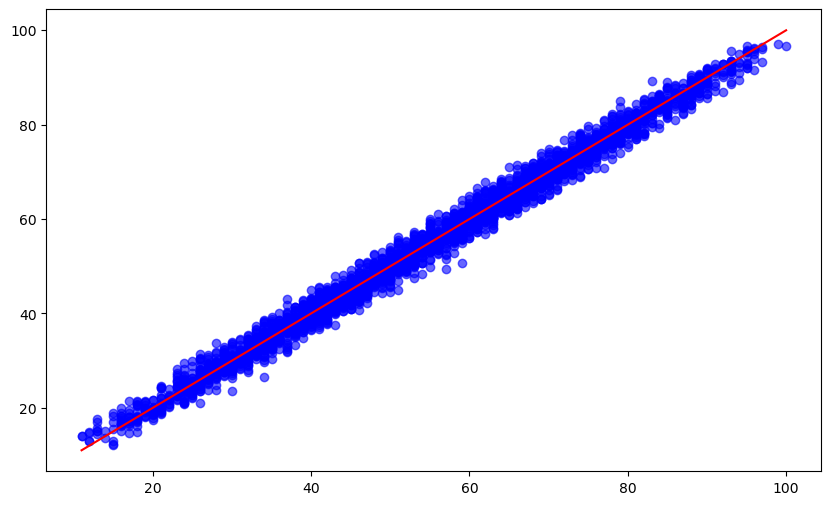

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()